Saving region.png to region (1).png
Original Image


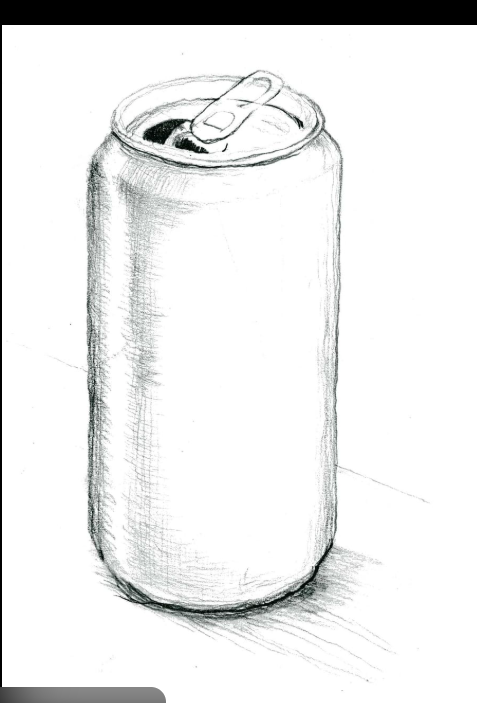

Binary Image


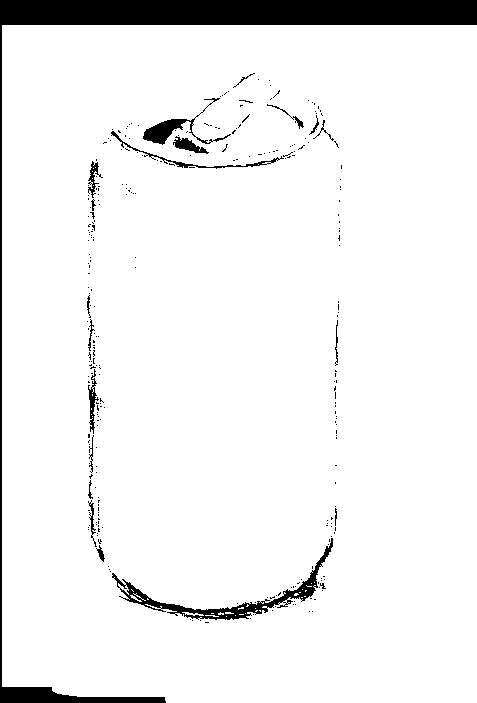

Region Tracing Output


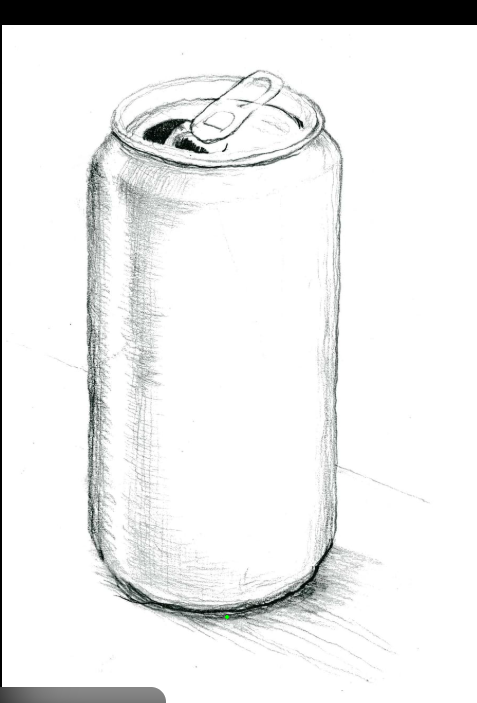

Total Regions Detected: 38


In [12]:
# Install OpenCV (if needed)
!pip install opencv-python

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# ==============================
# STEP 1: Upload image
# ==============================
uploaded = files.upload()
image_path = next(iter(uploaded))

# ==============================
# STEP 2: Read image
# ==============================
image = cv2.imread(image_path)

# ==============================
# STEP 3: Convert to grayscale
# ==============================
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ==============================
# STEP 4: Binary threshold (separates regions)
# ==============================
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# ==============================
# STEP 5: Connected Component Analysis (Region Tracing)
# ==============================
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)

# ==============================
# STEP 6: Draw bounding boxes for regions
# ==============================
output = image.copy()

for i in range(1, num_labels):  # skip background
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]

cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)

# ==============================
# STEP 7: Show results
# ==============================
print("Original Image")
cv2_imshow(image)

print("Binary Image")
cv2_imshow(binary)

print("Region Tracing Output")
cv2_imshow(output)

print("Total Regions Detected:", num_labels - 1)

